In [ ]:
import pandas as pd

Shape of output array:  (200, 3)
x, y, z for 50th point:  [ 1.12522122 -1.03334057 -0.24875952]


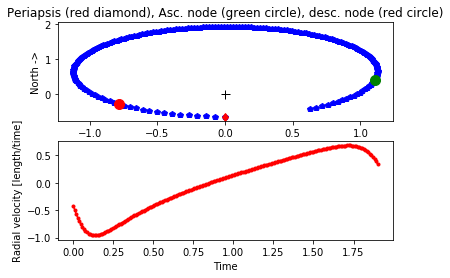

In [16]:
import numpy as np
from PyAstronomy import pyasl
import matplotlib.pylab as plt

# Instantiate a Keplerian elliptical orbit with
# semi-major axis of 1.3 length units,
# a period of 2 time units, eccentricity of 0.5,
# longitude of ascending node of 70 degrees, an inclination
# of 10 deg, and a periapsis argument of 110 deg.
ke = pyasl.KeplerEllipse(1.3, 2., e=0.5, Omega=70., i=10.0, w=110.0)

# Get a time axis
t = np.linspace(0, 1.9, 200)

# Calculate the orbit position at the given points
# in a Cartesian coordinate system.
pos = ke.xyzPos(t)
print("Shape of output array: ", pos.shape)

# x, y, and z coordinates for 50th time point
print("x, y, z for 50th point: ", pos[50, ::])

# Calculate orbit radius as a function of the
radius = ke.radius(t)

# Calculate velocity on orbit
vel = ke.xyzVel(t)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

# Plot x and y coordinates of the orbit
plt.subplot(2,1,1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::,1], pos[::,0], 'bp')
# Point of periapsis
plt.plot([pos[0,1]], [pos[0,0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)
# Plot RV
plt.subplot(2,1,2)
plt.xlabel("Time")
plt.ylabel("Radial velocity [length/time]")
plt.plot(t, vel[::,2], 'r.-')
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

t = np.linspace(1, 10, 100)

pos = ke.xyzPos(t)

fig = plt.figure()
ax = Axes3D(fig) #<-- Note the difference from your original code...
# ax.scatter(xs=true_value[:,:1], ys=true_value[:,1:2], zs=true_value[:,2:3], marker='o')
ax.scatter(xs=pos[:,:1], ys=pos[:,1:2], zs=pos[:,2:3], marker='^')
ax.view_init(elev=10., azim=300)
plt.show()

In [ ]:
t

In [ ]:
from __future__ import print_function, division
import numpy as np
from PyAstronomy import pyasl
import matplotlib.pylab as plt

# Instantiate a Keplerian elliptical orbit with
# semi-major axis of 1.3 length units,
# a period of 2 time units, eccentricity of 0.5,
# longitude of ascending node of 70 degrees, an inclination
# of 10 deg, and a periapsis argument of 110 deg.
ke = pyasl.KeplerEllipse(1.3, 2., e=0.5, Omega=70., i=10.0, w=110.0)

# Get a time axis
t = np.linspace(0, 1.9, 200)

# Calculate the orbit position at the given points
# in a Cartesian coordinate system.
pos = ke.xyzPos(t)
print("Shape of output array: ", pos.shape)

# x, y, and z coordinates for 50th time point
print("x, y, z for 50th point: ", pos[50, ::])

# Calculate orbit radius as a function of the
radius = ke.radius(t)

# Calculate velocity on orbit
vel = ke.xyzVel(t)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

# Plot x and y coordinates of the orbit
plt.subplot(2,1,1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::,1], pos[::,0], 'bp')
# Point of periapsis
plt.plot([pos[0,1]], [pos[0,0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)
# Plot RV
plt.subplot(2,1,2)
plt.xlabel("Time")
plt.ylabel("Radial velocity [length/time]")
plt.plot(t, vel[::,2], 'r.-')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl

# Generate n exponentially correlated Gaussian
# random numbers with a decay time, tau
n = 500
tau = 5.
c1 = pyasl.expCorrRN(n, tau)

# Obtain autocorrelation function
ac = np.correlate(c1, c1, mode="full")[n-1:]

# Plot correlated random numbers and autocorrelation
# function along with exponential model.
x = np.arange(float(n))
plt.subplot(2,1,1)
plt.plot(x, c1, 'bp-')
plt.subplot(2,1,2)
plt.plot(x, ac, 'b.')
plt.plot(x, np.exp(-x/tau)*ac.max(), 'r--')
plt.show()

In [ ]:
arr = np.array([[1,2,3,4,5,6]])

In [ ]:
np.sum(arr[:,:3] ** 2, axis=1)[0] ** 2

In [1]:
from pathlib import Path
import pandas as pd
from random import randint

COLUMNS = ['id', 'sat_id', 'x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim']
SATELLITES_NUM = 300

# sat_id = randint(0, SATELLITES_NUM)
# sat_id = 41
df = pd.read_csv(Path('./data/train.csv'), index_col='id', usecols=COLUMNS)
# df = df[df['sat_id'] == sat_id]  # take random satellite
# df.drop('sat_id', inplace=True, axis=1)
# df.reset_index(drop=True, inplace=True)

In [2]:
import numpy as np
df["orbit"] = df.apply(lambda x: np.sqrt(x['x_sim']**2 + x['y_sim']**2 + x['z_sim']**2), axis=1)
df["orbit"].describe()

count    649912.000000
mean      32733.466105
std       25618.047254
min        8046.932713
25%       15852.123930
50%       24511.458570
75%       40856.386946
max      294804.998946
Name: orbit, dtype: float64

In [3]:
ids = df.groupby("sat_id").mean().nlargest(5, ["orbit"]).index.values

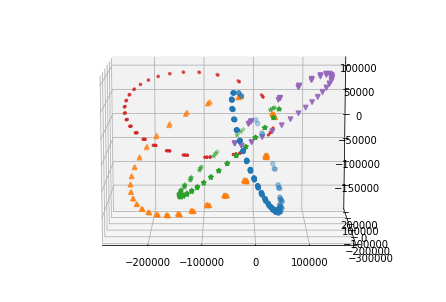

In [7]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

top_5 = df[df["sat_id"].isin(ids)]
markers = ["o", "^", "*", ".", "v"]

fig = plt.figure()
ax = Axes3D(fig) #<-- Note the difference from your original code...
# ax.scatter(xs=true_value[:,:1], ys=true_value[:,1:2], zs=true_value[:,2:3], marker='o')
for i in range(5):
    sat_df = top_5[top_5["sat_id"] == ids[i]]
    ax.scatter(xs=sat_df["x_sim"], ys=sat_df["y_sim"], zs=sat_df["z_sim"], marker=markers[i])
ax.view_init(elev=10., azim=270)
plt.show()

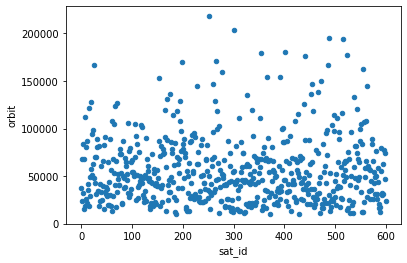

In [5]:
df.groupby("sat_id").mean().reset_index().plot.scatter(x="sat_id", y="orbit")

In [6]:
df.groupby("sat_id").cumsum().describe()

,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,orbit
count,6.499120e+05,6.499120e+05,6.499120e+05,649912.000000,649912.000000,649912.000000,6.499120e+05
mean,-5.604096e+05,5.344751e+05,2.044438e+05,-1.558702,1.354840,0.029154,2.223833e+07
std,7.286364e+06,7.054505e+06,5.655563e+06,15.585375,14.365376,11.648309,1.430400e+07
min,-3.944319e+07,-3.927813e+07,-3.434851e+07,-44.341904,-39.134578,-39.976431,8.046933e+03
25%,-3.773675e+06,-2.315157e+06,-1.556624e+06,-11.530157,-8.235634,-5.998444,1.041791e+07
50%,-2.868191e+05,1.357279e+05,2.571083e+04,-0.869249,0.562559,-0.003686,2.082014e+07
75%,2.615288e+06,3.117216e+06,1.829902e+06,7.692553,10.668278,5.745459,3.211396e+07
max,3.512070e+07,3.662456e+07,3.223096e+07,43.359890,42.544533,44.729490,6.494040e+07


In [8]:
sat_df["x_sim_shifted"] = sat_df["x_sim"].shift(1)
sat_df["y_sim_shifted"] = sat_df["y_sim"].shift(1)
sat_df["z_sim_shifted"] = sat_df["z_sim"].shift(1)
sat_df["x_sim_shifted2"] = sat_df["x_sim"].shift(2)
sat_df["y_sim_shifted2"] = sat_df["y_sim"].shift(2)
sat_df["z_sim_shifted2"] = sat_df["z_sim"].shift(2)
sat_df["x_sim_shifted3"] = sat_df["x_sim"].shift(3)
sat_df["y_sim_shifted3"] = sat_df["y_sim"].shift(3)
sat_df["z_sim_shifted3"] = sat_df["z_sim"].shift(3)
sat_df.head()

/opt/anaconda3/envs/idao/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/idao/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/idao/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,orbit,x_sim_shifted,y_sim_shifted,z_sim_shifted,x_sim_shifted2,y_sim_shifted2,z_sim_shifted2,x_sim_shifted3,y_sim_shifted3,z_sim_shifted3
id,,,,,,,,,,,,,,,,,
810261,402,-10430.976342,-40916.626265,5628.345681,-2.708352,1.169647,-2.690597,42598.754060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810262,402,-39033.728655,20784.652576,-40219.464504,0.107763,3.090938,-0.999573,59776.576352,-10430.976342,-40916.626265,5628.345681,NaN,NaN,NaN,NaN,NaN,NaN
810263,402,-25799.215130,79802.313261,-49974.361272,0.838364,2.165118,-0.057967,97629.122129,-39033.728655,20784.652576,-40219.464504,-10430.976342,-40916.626265,5628.345681,NaN,NaN,NaN
810264,402,-5108.589243,121247.746282,-47257.504946,0.946271,1.546247,0.251848,130232.044583,-25799.215130,79802.313261,-49974.361272,-39033.728655,20784.652576,-40219.464504,-10430.976342,-40916.626265,5628.345681
810265,402,16346.005348,151261.004098,-39844.340036,0.932075,1.130695,0.387331,157272.549049,-5108.589243,121247.746282,-47257.504946,-25799.215130,79802.313261,-49974.361272,-39033.728655,20784.652576,-40219.464504


In [9]:
def equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3, x, y, z):  
      
    a1 = x2 - x1 
    b1 = y2 - y1 
    c1 = z2 - z1 
    a2 = x3 - x1 
    b2 = y3 - y1 
    c2 = z3 - z1 
    a = b1 * c2 - b2 * c1 
    b = a2 * c1 - a1 * c2 
    c = a1 * b2 - b1 * a2 
    d = (- a * x1 - b * y1 - c * z1) 
      
    # equation of plane is: a*x + b*y + c*z = 0 # 
      
    # checking if the 4th point satisfies 
    # the above equation 
    eq = a * x + b * y + c * z + d
    print(f"a: {a}, b: {b}, c: {c}, d: {d}, eq: {eq}")
    if(a * x + b * y + c * z + d == 0): 
        print("Coplanar") 
    else: 
        print("Not Coplanar")

In [15]:
# sat_df.reset_index(inplace=True)
for i in range(len(sat_df.loc[:].values)):
    if i < 3:
        continue
    equation_plane(sat_df.iloc[i]["x_sim_shifted3"], sat_df.iloc[i]["y_sim_shifted3"], sat_df.iloc[i]["z_sim_shifted3"], 
                   sat_df.iloc[i]["x_sim_shifted2"], sat_df.iloc[i]["y_sim_shifted2"], sat_df.iloc[i]["z_sim_shifted2"], 
                   sat_df.iloc[i]["x_sim_shifted"], sat_df.iloc[i]["y_sim_shifted"], sat_df.iloc[i]["z_sim_shifted"], 
                   sat_df.iloc[i]["x_sim"], sat_df.iloc[i]["y_sim"], sat_df.iloc[i]["z_sim"])


a: 2103940899.0363312, b: -885790360.0648236, c: -2504653939.984459, d: -200337185811.66406, eq: 15104091584.132812
Not Coplanar
a: 564638425.392588, b: -237791191.38672948, c: -672602194.1141026, d: -69349687933.90234, eq: -8910810689.515625
Not Coplanar
a: 225700120.40450433, b: -95093970.76929803, c: -268201873.9390657, d: 8387463666.71875, eq: -4230961221.0234375
Not Coplanar
a: 125607481.07319444, b: -53061021.52438676, c: -148698090.2558248, d: 48105566090.41016, eq: -2025885276.3344727
Not Coplanar
a: 83461825.42062753, b: -35412237.98569542, c: -98450377.63864136, d: 69532907136.78223, eq: -1023522448.4744873
Not Coplanar
a: 61866487.38788074, b: -26380983.602599204, c: -72782753.14491439, d: 80186892540.4248, eq: -512916453.30529785
Not Coplanar
a: 49448983.00114024, b: -21179265.51705855, c: -58084282.39151335, d: 83491020087.98657, eq: -227030661.5003662
Not Coplanar
a: 41817166.460387394, b: -17963056.712303817, c: -49089269.773334235, d: 81359268429.90784, eq: -55437393.78

In [14]:
sat_df.iloc[0]

sat_id              402.000000
x_sim            -10430.976342
y_sim            -40916.626265
z_sim              5628.345681
Vx_sim               -2.708352
Vy_sim                1.169647
Vz_sim               -2.690597
orbit             42598.754060
x_sim_shifted              NaN
y_sim_shifted              NaN
z_sim_shifted              NaN
x_sim_shifted2             NaN
y_sim_shifted2             NaN
z_sim_shifted2             NaN
x_sim_shifted3             NaN
y_sim_shifted3             NaN
z_sim_shifted3             NaN
Name: 810261, dtype: float64

In [ ]:
def equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):  
      
    a1 = x2 - x1 
    b1 = y2 - y1 
    c1 = z2 - z1 
    a2 = x3 - x1 
    b2 = y3 - y1 
    c2 = z3 - z1 
    a = b1 * c2 - b2 * c1 
    b = a2 * c1 - a1 * c2 
    c = a1 * b2 - b1 * a2 
    d = (- a * x1 - b * y1 - c * z1) 
    print("equation of plane is ")
    print(a, "x +")
    print(b, "y +")
    print(c, "z +")
    print(d, "= 0.")
  
# # Driver Code  
# x1 =-1 
# y1 = 2
# z1 = 1
# x2 = 0
# y2 =-3
# z2 = 2
# x3 = 1
# y3 = 1
# z3 =-4
# equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3) 


In [ ]:
for i in range(len(sat_df.loc[:].values)):
    if i < 3:
        continue
    equation_plane(sat_df.loc[i]["x_sim_shifted3"], sat_df.loc[i]["y_sim_shifted3"], sat_df.loc[i]["z_sim_shifted3"], 
                   sat_df.loc[i]["x_sim_shifted2"], sat_df.loc[i]["y_sim_shifted2"], sat_df.loc[i]["z_sim_shifted2"], 
                   sat_df.loc[i]["x_sim_shifted"], sat_df.loc[i]["y_sim_shifted"], sat_df.loc[i]["z_sim_shifted"])